In [86]:
import pandas as pd

In [87]:
cases_parquet = 'cases.parquet'
population_parquet = 'population.parquet'
geography_parquet = 'geography.parquet'
policies_parquet = 'policies.parquet'
recoveries_parquet = 'recoveries.parquet'
deaths_parquet = 'deaths.parquet'
dates_parquet = 'dates.parquet'

In [139]:
cases = pd.read_parquet(cases_parquet)
population = pd.read_parquet(population_parquet)
geography = pd.read_parquet(geography_parquet)
recoveries = pd.read_parquet(recoveries_parquet)
deaths = pd.read_parquet(deaths_parquet)
dates = pd.read_parquet(dates_parquet)
policies = pd.read_parquet(policies_parquet)

In [5]:
cases

,ID,Updated,Confirmed,Confirmed_Change,Country_Region
0,340075,2020-02-10,3,0,Italy
1,340114,2020-02-02,2,0,Russia
2,7157841,2020-04-02,115242,4668,Italy
3,7158618,2020-03-28,1264,228,Russia
4,7158649,2020-04-06,6343,954,Russia
...,...,...,...,...,...
4205,85208342,2020-11-09,27653,100,South Korea
4206,92315518,2020-12-02,1659256,16170,United Kingdom
4207,92874392,2020-12-04,36915,583,South Korea
4208,119579732,2021-02-18,420408,1393,Japan


In [6]:
countries = ["Russia", "United Kingdom", "Canada", "South Korea", "Japan", "New Zealand", "France", "Germany", "Italy", 
            "Sweden"]

In [140]:
policies_10 = policies[policies['CountryName'].isin(countries)]
policies_10

,CountryName,Date,C1_School_closing,C1_Flag,C2_Workplace_closing,C2_Flag,C3_Cancel_public_events,C3_Flag,C4_Restrictions_on_gatherings,C4_Flag,...,H3_Contact_tracing,H4_Emergency_investment_in_healthcare,H5_Investment_in_vaccines,H6_Facial_Coverings,H6_Flag,H7_Vaccination_policy,H7_Flag,H8_Protection_of_elderly_people,H8_Flag,id
13692,Canada,2020-01-01,0,0,0,0,0,0,0,0,...,1,NaN,NaN,NaN,0,0,0,0,0,4af4717e-3405-b98f-8263-a0dcb1846d3c
13693,Canada,2020-01-02,0,0,0,0,0,0,0,0,...,1,NaN,NaN,NaN,0,0,0,0,0,dc084d06-93e0-f35a-e37f-18547133d4d6
13694,Canada,2020-01-03,0,0,0,0,0,0,0,0,...,1,NaN,NaN,NaN,0,0,0,0,0,74b1e003-5ebe-6551-81fb-c2b8cb81004f
13695,Canada,2020-01-04,0,0,0,0,0,0,0,0,...,1,NaN,NaN,NaN,0,0,0,0,0,2bca3a9d-d7f7-e78e-3029-dc03cf689400
13696,Canada,2020-01-05,0,0,0,0,0,0,0,0,...,1,NaN,NaN,NaN,0,0,0,0,0,99bc452c-1483-96cb-1035-6b279ab01ad7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80320,United Kingdom,2021-03-28,2,0,3,0,2,1,4,1,...,1,NaN,NaN,NaN,1,4,1,2,1,6f0cdb47-dd1f-5712-63a9-0b5b15476e38
80321,United Kingdom,2021-03-29,0,0,0,0,0,0,0,0,...,0,NaN,NaN,NaN,0,0,0,0,0,61898803-e042-f185-fabb-5051e3bcb868
80322,United Kingdom,2021-03-30,0,0,0,0,0,0,0,0,...,0,NaN,NaN,NaN,0,0,0,0,0,cdd450de-370f-fbd7-12fa-0792941b753b
80323,United Kingdom,2021-03-31,0,0,0,0,0,0,0,0,...,0,NaN,NaN,NaN,0,0,0,0,0,07cd326d-5a63-5a11-1d13-dcba3b878d17


In [141]:
policies_cases = pd.merge(policies_10, cases, left_on= ['Date', 'CountryName'], right_on = ['Updated', 'Country_Region'], how='inner')
policies_cases

,CountryName,Date,C1_School_closing,C1_Flag,C2_Workplace_closing,C2_Flag,C3_Cancel_public_events,C3_Flag,C4_Restrictions_on_gatherings,C4_Flag,...,H7_Vaccination_policy,H7_Flag,H8_Protection_of_elderly_people,H8_Flag,id,ID,Updated,Confirmed,Confirmed_Change,Country_Region
0,Canada,2020-01-25,0,0,0,0,0,0,0,0,...,0,0,0,0,e4ad5c3e-24a1-457d-c718-752f9411bfad,7159711,2020-01-25,1,0,Canada
1,Canada,2020-01-26,0,0,0,0,0,0,0,0,...,0,0,0,0,c2b68464-1da2-3869-2073-b0e55306f256,7159713,2020-01-26,1,0,Canada
2,Canada,2020-01-27,0,0,0,0,0,0,0,0,...,0,0,0,0,d5bb2851-94a6-ba1d-9c51-3482b700d73f,7159715,2020-01-27,2,1,Canada
3,Canada,2020-01-28,0,0,0,0,0,0,0,0,...,0,0,0,0,9b92960b-411f-e991-8a58-19cd951386f5,7159717,2020-01-28,3,1,Canada
4,Canada,2020-01-29,0,0,0,0,0,0,0,0,...,0,0,0,0,1d7889c9-b7e8-ebb9-7b25-1fdd3613b2aa,339668,2020-01-29,3,0,Canada
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4189,United Kingdom,2021-03-21,2,0,3,0,2,1,4,1,...,4,1,2,1,dbf0b84b-fc50-5f49-9255-c762e6bfec5d,123955635,2021-03-21,4296583,5312,United Kingdom
4190,United Kingdom,2021-03-22,2,0,3,0,2,1,4,1,...,4,1,2,1,7f0d0428-b5ae-9579-b647-6e351ea05429,123955636,2021-03-22,4301925,5342,United Kingdom
4191,United Kingdom,2021-03-23,2,0,3,0,2,1,4,1,...,4,1,2,1,9af44c82-053e-d338-fa42-0f141f7f0faf,124072966,2021-03-23,4304614,2689,United Kingdom
4192,United Kingdom,2021-03-24,2,0,3,0,2,1,4,1,...,4,1,2,1,46ac9409-5949-cb73-9af6-74f96269337c,124091106,2021-03-24,4307304,2690,United Kingdom


In [142]:


policies_cases['Date'] = pd.to_datetime(policies_cases['Date'])

cutoff_date = pd.to_datetime('2020-04-01')
policies_cases = policies_cases[policies_cases['Date'] >= cutoff_date]

policies_cases


,CountryName,Date,C1_School_closing,C1_Flag,C2_Workplace_closing,C2_Flag,C3_Cancel_public_events,C3_Flag,C4_Restrictions_on_gatherings,C4_Flag,...,H7_Vaccination_policy,H7_Flag,H8_Protection_of_elderly_people,H8_Flag,id,ID,Updated,Confirmed,Confirmed_Change,Country_Region
67,Canada,2020-04-01,3,1,3,1,2,0,4,0,...,0,0,3,0,141c6e7e-c576-1c56-0385-7531a258c101,7159811,2020-04-01,9731,1140,Canada
68,Canada,2020-04-02,3,1,3,1,2,0,4,0,...,0,0,3,0,f57f5311-7e18-047a-4256-0abbb51fe722,7159813,2020-04-02,11285,1554,Canada
69,Canada,2020-04-03,3,1,3,1,2,0,4,0,...,0,0,3,0,c8e68326-dad7-f7c3-368d-a7140dad097e,7159814,2020-04-03,12549,1264,Canada
70,Canada,2020-04-04,3,1,3,0,2,0,4,0,...,0,0,3,0,b9935a5c-5704-beeb-efb5-f9067c305c78,7159815,2020-04-04,14018,1469,Canada
71,Canada,2020-04-05,3,1,3,0,2,0,4,0,...,0,0,3,0,9e5ef1db-e24d-72ee-b796-755436b13297,7159817,2020-04-05,15513,1495,Canada
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4189,United Kingdom,2021-03-21,2,0,3,0,2,1,4,1,...,4,1,2,1,dbf0b84b-fc50-5f49-9255-c762e6bfec5d,123955635,2021-03-21,4296583,5312,United Kingdom
4190,United Kingdom,2021-03-22,2,0,3,0,2,1,4,1,...,4,1,2,1,7f0d0428-b5ae-9579-b647-6e351ea05429,123955636,2021-03-22,4301925,5342,United Kingdom
4191,United Kingdom,2021-03-23,2,0,3,0,2,1,4,1,...,4,1,2,1,9af44c82-053e-d338-fa42-0f141f7f0faf,124072966,2021-03-23,4304614,2689,United Kingdom
4192,United Kingdom,2021-03-24,2,0,3,0,2,1,4,1,...,4,1,2,1,46ac9409-5949-cb73-9af6-74f96269337c,124091106,2021-03-24,4307304,2690,United Kingdom


In [101]:
check = policies_cases[policies_cases['H2_Testing_policy'] == 1]
avg = check['Confirmed_Change'].mean()
avg

6190.6227390180875

In [102]:
average_value_0 = policies_cases[policies_cases['H2_Testing_policy'] == 0]['Confirmed_Change'].mean()
average_value_1 = policies_cases[policies_cases['H2_Testing_policy'] == 1]['Confirmed_Change'].mean()
average_value_2 = policies_cases[policies_cases['H2_Testing_policy'] == 2]['Confirmed_Change'].mean()
average_value_3 = policies_cases[policies_cases['H2_Testing_policy'] == 3]['Confirmed_Change'].mean()


In [104]:
def average(policy: str, variations: int):
    if variations == 4:
        average_value_0 = policies_cases[policies_cases[policy] == 0]['Confirmed_Change'].mean()
        average_value_1 = policies_cases[policies_cases[policy] == 1]['Confirmed_Change'].mean()
        average_value_2 = policies_cases[policies_cases[policy] == 2]['Confirmed_Change'].mean()
        average_value_3 = policies_cases[policies_cases[policy] == 3]['Confirmed_Change'].mean()
        averages = [average_value_0, average_value_1, average_value_2, average_value_3]
        averages = {f"{policy}_0": average_value_0, f"{policy}_1": average_value_1, 
                    f"{policy}_2": average_value_2, f"{policy}_3": average_value_3}
    elif variations == 3:
        average_value_0 = policies_cases[policies_cases[policy] == 0]['Confirmed_Change'].mean()
        average_value_1 = policies_cases[policies_cases[policy] == 1]['Confirmed_Change'].mean()
        average_value_2 = policies_cases[policies_cases[policy] == 2]['Confirmed_Change'].mean()
        averages = {f"{policy}_0": average_value_0, f"{policy}_1": average_value_1, 
                    f"{policy}_2": average_value_2}

    elif variations == 5:
        average_value_0 = policies_cases[policies_cases[policy] == 0]['Confirmed_Change'].mean()
        average_value_1 = policies_cases[policies_cases[policy] == 1]['Confirmed_Change'].mean()
        average_value_2 = policies_cases[policies_cases[policy] == 2]['Confirmed_Change'].mean()
        average_value_3 = policies_cases[policies_cases[policy] == 3]['Confirmed_Change'].mean()
        average_value_4 = policies_cases[policies_cases[policy] == 4]['Confirmed_Change'].mean()
        averages = {f"{policy}_0": average_value_0, f"{policy}_1": average_value_1, 
                    f"{policy}_2": average_value_2, f"{policy}_3": average_value_3,
                   f"{policy}_4": average_value_4}
    else: 
        raise ValueError("Error: Condition is False")

    return averages


In [90]:
policies_cases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4194 entries, 0 to 4193
Data columns (total 40 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   CountryName                            4194 non-null   object 
 1   Date                                   4194 non-null   object 
 2   C1_School_closing                      4194 non-null   int64  
 3   C1_Flag                                4194 non-null   int64  
 4   C2_Workplace_closing                   4194 non-null   int64  
 5   C2_Flag                                4194 non-null   int64  
 6   C3_Cancel_public_events                4194 non-null   int64  
 7   C3_Flag                                4194 non-null   int64  
 8   C4_Restrictions_on_gatherings          4194 non-null   int64  
 9   C4_Flag                                4194 non-null   int64  
 10  C5_Close_public_transport              4194 non-null   int64  
 11  C5_F

In [105]:
c1 = average('C1_School_closing', 4)
c2 = average('C2_Workplace_closing', 3)
c3 = average('C3_Cancel_public_events', 3)
c4 = average('C4_Restrictions_on_gatherings', 5)
c5 = average('C5_Close_public_transport', 3)
c6 = average('C6_Stay_at_home_requirements', 4)
c7 = average('C7_Restrictions_on_internal_movement', 3)
c8 = average('C8_International_travel_controls', 5)
e1 = average('E1_Income_support', 3)
h1 = average('H1_Public_information_campaigns', 3)
h2 = average('H2_Testing_policy', 4)
h3 = average('H3_Contact_tracing', 3)

In [106]:
h2 = average('H2_Testing_policy', 4)

In [107]:
dicts = [c1, c2, c3, c4, c5, c6, c7, c8, e1, h1, h2, h3]
average_dict = {}
for d in dicts:
    average_dict.update(d)
print(average_dict)

{'C1_School_closing_0': 935.6, 'C1_School_closing_1': 5551.300204918033, 'C1_School_closing_2': 7757.233419465978, 'C1_School_closing_3': 5695.254885301614, 'C2_Workplace_closing_0': 248.35427135678393, 'C2_Workplace_closing_1': 1889.5806028833551, 'C2_Workplace_closing_2': 6898.086801426873, 'C3_Cancel_public_events_0': 251.10599078341014, 'C3_Cancel_public_events_1': 2217.8349673202615, 'C3_Cancel_public_events_2': 7259.513090909091, 'C4_Restrictions_on_gatherings_0': 839.0253807106599, 'C4_Restrictions_on_gatherings_1': 2689.95, 'C4_Restrictions_on_gatherings_2': 607.3395061728395, 'C4_Restrictions_on_gatherings_3': 6728.426258992806, 'C4_Restrictions_on_gatherings_4': 7682.653881278538, 'C5_Close_public_transport_0': 4717.065331425846, 'C5_Close_public_transport_1': 7972.442428471738, 'C5_Close_public_transport_2': 1209.591836734694, 'C6_Stay_at_home_requirements_0': 1702.6024844720496, 'C6_Stay_at_home_requirements_1': 4219.876948775056, 'C6_Stay_at_home_requirements_2': 13198.933

In [108]:
average_dict_sorted = dict(sorted(average_dict.items(), key=lambda item: item[1], reverse=True))
print(average_dict_sorted)

{'H1_Public_information_campaigns_0': 26923.0, 'C6_Stay_at_home_requirements_2': 13198.933920704845, 'C5_Close_public_transport_1': 7972.442428471738, 'H1_Public_information_campaigns_1': nan, 'H2_Testing_policy_0': 26923.0, 'H3_Contact_tracing_0': 8329.234234234234, 'C7_Restrictions_on_internal_movement_2': 7888.211551376763, 'C8_International_travel_controls_3': 7872.10498046875, 'H2_Testing_policy_3': 7780.665486725664, 'C1_School_closing_2': 7757.233419465978, 'C4_Restrictions_on_gatherings_4': 7682.653881278538, 'C3_Cancel_public_events_2': 7259.513090909091, 'C2_Workplace_closing_2': 6898.086801426873, 'C4_Restrictions_on_gatherings_3': 6728.426258992806, 'E1_Income_support_1': 6547.349687778769, 'C6_Stay_at_home_requirements_3': 6304.857142857143, 'H2_Testing_policy_1': 6190.6227390180875, 'C8_International_travel_controls_2': 6072.835443037975, 'H1_Public_information_campaigns_2': 5960.754822476936, 'H3_Contact_tracing_1': 5921.008097165992, 'H3_Contact_tracing_2': 5879.1475327

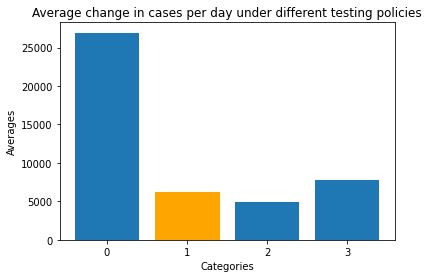

In [103]:
import matplotlib.pyplot as plt

# Manually specified values
categories = ['0', '1', '2', '3']
values = [average_value_0, average_value_1, average_value_2, average_value_3]
highlight_index = 1

# Create a bar chart
bars = plt.bar(categories, values)

bars[highlight_index].set_color('orange')


# Add labels and title
plt.xlabel('Categories')
plt.ylabel('Averages')
plt.title('Average change in cases per day under different testing policies')

# Show the plot
plt.show()


In [109]:
def change(initial, final):
    """Calculate the percentage change between old and new values."""
    try:
        percentage_change = ((final - initial) / abs(initial)) * 100
        return percentage_change
    except ZeroDivisionError:
        # Handle the case where old_value is 0 to avoid division by zero
        return float('inf')

# Example usage
initial = average_value_0
final = average_value_1

percentage_change = change(initial, final)
print(f"The percentage change is: {percentage_change:.2f}%")


The percentage change is: -77.01%


In [110]:
pc_01 = change(average_value_0, average_value_1)
pc_12 = change(average_value_1, average_value_2)
pc_23 = change(average_value_2, average_value_3)
pc_01, pc_12, pc_23

(-77.00619270134054, -20.53674410904623, 58.16706284641102)

In [136]:
japan_pc = policies_cases[policies_cases["CountryName"] == 'Japan']
policies_cases = japan_pc
policies_cases

,CountryName,Date,C1_School_closing,C1_Flag,C2_Workplace_closing,C2_Flag,C3_Cancel_public_events,C3_Flag,C4_Restrictions_on_gatherings,C4_Flag,...,H7_Vaccination_policy,H7_Flag,H8_Protection_of_elderly_people,H8_Flag,id,ID,Updated,Confirmed,Confirmed_Change,Country_Region
1764,Japan,2020-04-01,3,0,1,1,1,1,0,0,...,0,0,3,1,2d871497-c1d1-294c-a774-20811efdc4da,7163539,2020-04-01,2384,206,Japan
1765,Japan,2020-04-02,3,0,1,1,1,1,0,0,...,0,0,3,1,f9b10023-310b-3287-3976-5ee2db8316a0,7163542,2020-04-02,2617,233,Japan
1766,Japan,2020-04-03,3,0,1,1,1,1,0,0,...,0,0,3,1,f36508c5-9c1e-4515-9f7a-aeff82568c71,7163545,2020-04-03,2920,303,Japan
1767,Japan,2020-04-04,3,0,1,1,1,1,0,0,...,0,0,3,1,c45f215c-0825-9ea2-f2d1-63b0c23aa211,7163548,2020-04-04,3271,351,Japan
1768,Japan,2020-04-05,3,0,1,1,1,1,0,0,...,0,0,3,1,b8e7368c-c141-714e-d8cb-34e5dbedcd7b,7163552,2020-04-05,3654,383,Japan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2116,Japan,2021-03-21,1,1,1,0,1,1,1,1,...,1,1,3,1,14da8037-f969-d589-72f1-c805ee0bde42,123913234,2021-03-21,455638,1480,Japan
2117,Japan,2021-03-22,1,1,1,0,1,1,1,1,...,1,1,3,1,9d9d6552-7533-027b-4b2f-3c8b024ba44f,123913238,2021-03-22,456781,1143,Japan
2118,Japan,2021-03-23,1,1,1,0,1,1,1,1,...,1,1,3,1,a8fbc004-1590-ecbe-453a-5a8b78915201,124073297,2021-03-23,457754,973,Japan
2119,Japan,2021-03-24,1,1,1,0,1,1,1,1,...,1,1,3,1,b0001d7a-b873-5ab2-ef46-1947005d3883,124091171,2021-03-24,459043,1289,Japan


In [138]:
average('C4_Restrictions_on_gatherings', 4)

{'C4_Restrictions_on_gatherings_0': 863.6173285198556,
 'C4_Restrictions_on_gatherings_1': 2689.95,
 'C4_Restrictions_on_gatherings_2': nan,
 'C4_Restrictions_on_gatherings_3': nan}

In [144]:
average('C4_Restrictions_on_gatherings', 4)

{'C4_Restrictions_on_gatherings_0': 839.0253807106599,
 'C4_Restrictions_on_gatherings_1': 2689.95,
 'C4_Restrictions_on_gatherings_2': 607.3395061728395,
 'C4_Restrictions_on_gatherings_3': 6728.426258992806}

In [145]:
average('C6_Stay_at_home_requirements', 5)

{'C6_Stay_at_home_requirements_0': 1702.6024844720496,
 'C6_Stay_at_home_requirements_1': 4219.876948775056,
 'C6_Stay_at_home_requirements_2': 13198.933920704845,
 'C6_Stay_at_home_requirements_3': 6304.857142857143,
 'C6_Stay_at_home_requirements_4': nan}

In [ ]:
pc_01 = change(839.03, 2689.95)
pc_12 = change(2689.95, 607.)

In [114]:
pc_01 = change(4717.06, 7972.44)
pc_12 = change(7972.44, 1209.59)
y = pc_01, pc_12

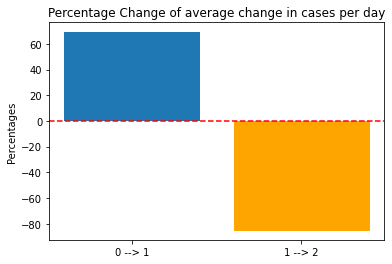

In [124]:
x = ['0 --> 1', '1 --> 2']
y
highlight_index = 1

bars = plt.bar(x, y)

bars[highlight_index].set_color('orange')


# Add labels and title
plt.ylabel('Percentage')
plt.title('Percentage change of average change in cases per day')
plt.axhline(0, color='red', linestyle='--', label='Zero Line')


# Show the plot
plt.show()

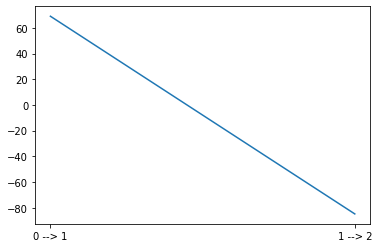

In [123]:
plt.plot(x, y)